## BLM19462E Intro to MachineLearning HW2

### Name:Evren Keskin
### Student ID:1621221030

In [13]:
import numpy as np
import scipy.linalg

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


np.random.seed(seed=21)

# ignore warnings
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

<class 'ModuleNotFoundError'>: No module named 'seaborn'

**Q3-** In this question, you are expected to implement polynomial regression for given data, 


In [2]:
df=pd.read_csv("Q3Data.csv")
df.head()

,x,y
0,-5.000000,-5323.862726
1,-4.878788,-5144.144737
2,-4.757576,-4377.522115
3,-4.636364,-3435.943050
4,-4.515152,-3081.358792


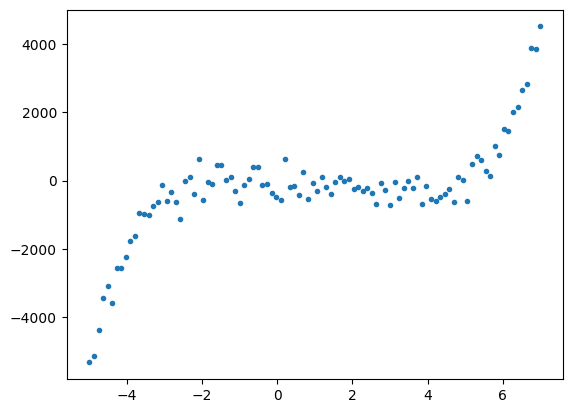

In [3]:
plt.scatter(df['x'], df['y'], s=9)
plt.show()

- **a)** Find the best fitting line with order ($k$) using the method ```LinearRegression``` from the package ```scikit-learn```.


In [14]:
# Load the data
df = pd.read_csv("Q3Data.csv")

# Extract features and target variable
X = df[['x']]
y = df['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store training and test errors
train_errors = []
test_errors = []

# Define a range of polynomial orders to test
orders = range(1, 10)

# Iterate over each polynomial order
for order in orders:
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree=order)
    X_poly_train = polynomial_features.fit_transform(X_train)
    X_poly_test = polynomial_features.transform(X_test)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Calculate training error
    y_train_pred = model.predict(X_poly_train)
    train_error = np.mean((y_train_pred - y_train) ** 2)
    train_errors.append(train_error)

    # Calculate test error
    y_test_pred = model.predict(X_poly_test)
    test_error = np.mean((y_test_pred - y_test) ** 2)
    test_errors.append(test_error)

# Print the best polynomial order
best_order = orders[np.argmin(test_errors)]
print("Best polynomial order:", best_order)


Best polynomial order: 5


- **b)** Show bias-variance trade-off (plot each case) and explain in detail.

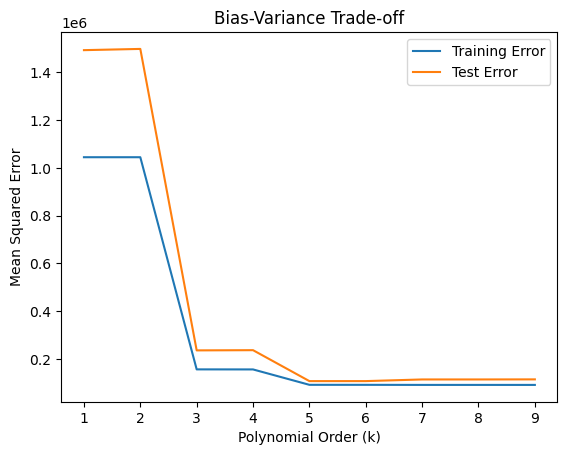

In [10]:
# Plotting bias-variance trade-off
plt.plot(orders, train_errors, label='Training Error')
plt.plot(orders, test_errors, label='Test Error')
plt.xlabel('Polynomial Order (k)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Trade-off')
plt.legend()
plt.show()


- **c)** Calculate predicted output for obtained order $k$ using Normal equation:

    - $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$
 
and compare the results with previous results.

- **Hint:** Use pseudo-inverse of a matrix

In [12]:
# Create polynomial features for the best order
polynomial_features = PolynomialFeatures(degree=best_order)
X_poly = polynomial_features.fit_transform(X)

# Calculate theta using the Normal equation
theta = np.linalg.pinv(X_poly).dot(y)

# Predict output using the calculated theta
y_pred_normal = np.dot(X_poly, theta)

# Compare results
print("Predicted output using Normal equation:\n", y_pred_normal)


Predicted output using Normal equation:
 [-5457.21329406 -4875.86000504 -4343.93751171 -3858.31045655
 -3415.97623912 -3014.06221679 -2649.82290537 -2320.63717977
 -2024.00547467 -1757.54698516 -1518.99686745 -1306.20343947
 -1117.12538157  -949.82893717  -802.48511341  -673.36688184
  -560.84637906  -463.39210737  -379.56613545  -308.02129902
  -247.4984015   -196.82341466  -154.90467929  -120.73010586
   -93.36437517   -71.94613905   -55.68522095   -43.85981668
   -35.81369502   -30.95339839   -28.74544351   -28.71352209
   -30.43570144   -33.54162518   -37.70971387   -42.66436568
   -48.17315705   -54.04404335   -60.12255955   -66.28902087
   -72.45572344   -78.56414497   -84.58214542   -90.50116761
   -96.33343796  -102.10916709  -107.87375049  -113.68496921
  -119.61019049  -125.72356845  -132.1032447   -138.82854907
  -145.97720021  -153.6225063   -161.83056566  -170.65746746
  -180.14649235  -190.32531313  -201.20319541  -212.76819829
  -224.98437497  -237.78897347  -251.0896372